In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').show();
 } else {
 $('div.input').hide();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for
this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import math
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import itertools
from susipop import filter
from susipop import reader
from IPython.html.widgets import FloatProgress
from IPython.display import display
from ipywidgets import interactive, interact_manual
import ipywidgets as widgets
import scipy.stats as ss

%matplotlib notebook

import plotly
import susipop as sp
import pylab

import warnings
warnings.filterwarnings('ignore')

/home/vsivadas/.local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def get_folder_list(path="."):
    f = next(os.walk(path))[1]
    return f
def sort_data(x,y):
    lists = sorted(itertools.izip(*[x, y]))
    new_x, new_y = list(itertools.izip(*lists))
    return new_x, new_y

# Plot Normal Stress Differences as a function of phi

In [4]:
# #phivals = [float(i)/100.0 for i in sys.argv[1:]]

# phivals = [40.,45.,50.,54.,55.,56.,58.]
# #solid part
# ialist = ['tot','hd','lub','rep','fric']

# folders = get_folder_list()
# db = dict()
# for p in phivals:
#     db[p] = dict()
#     db[p]['shearrate'] = []
#     db[p]['shearstress'] = []
#     for ia in ialist:
#         db[p][ia] = [[],[],[]]

# def num_points(max_strain):
#     if max_strain < 1.0: return -5
#     elif (max_strain >= 1.0) and (max_strain <=2.0): return -10

# f = FloatProgress(min=0, max=100)
# display(f)
# L = widgets.Label("")
# display(L)
# progress = widgets.Label("")
# display(progress)


# for num,folder in enumerate(np.sort(folders[:])):
#     try:
#         path = folder+"/result/part_stress_norm_tot_t.dat"
#         if os.path.exists(path):
#             exp = reader.DataSet(folder, fluid=False, particles=True)
#             exp.load_state(exp.tlist[-1])
            
#             max_strain = float(exp.t)*exp.shearrate*exp.dt
#             n = len(exp.tlist[1:])
#             if max_strain >= 2:
#                 n_last_strain = int(float(n)/max_strain*(max_strain - 1))
#             else:
#                 n_last_strain = -10
                
#             f.value = float(num+1)/len(folders[:])*100
#             L.value = folder
#             p = round(exp.phi*100)
#             db_visc = pd.read_csv(folder+"/result/nu_t.dat")
#             visc = db_visc[db_visc.columns[2]]
#             time = db_visc[db_visc.columns[0]]
#             shearstress = np.multiply(visc,exp.shearrate)
            
#             type = 'mean'  #type is 'mean' or 'all' or 'half' or 'laststrain'
            
#             if type == 'mean':
#                 shearstress = np.mean(shearstress[n_last_strain:])
#                 db[p]['shearstress'].append(shearstress)
#                 db[p]['shearrate'].append(exp.shearrate)
#             if type == 'last':
#                 shearstress = shearstress[-20:]
#                 db[p]['shearstress'].extend(list(shearstress))
#                 db[p]['shearrate'].extend(list(np.ones_like(shearstress)*exp.shearrate))
#             if type == 'half':
#                 shearstress = shearstress[int(len(shearstress)/2):]
#                 db[p]['shearstress'].extend(list(shearstress))
#                 db[p]['shearrate'].extend(list(np.ones_like(shearstress)*exp.shearrate))
#             if type == 'laststrain':
#                 shearstress = shearstress[n_last_strain:]
#                 db[p]['shearstress'].extend(list(shearstress))
#                 db[p]['shearrate'].extend(list(np.ones_like(shearstress)*exp.shearrate))
                
#             for ia in ialist:
#                 path = folder+"/result/part_stress_norm_"+ia+"_t.dat"
#                 df = pd.read_csv(path)
#                 s11 = np.asarray(df[df.columns[2]])
#                 s22 = np.asarray(df[df.columns[3]])
#                 s33 = np.asarray(df[df.columns[4]])
#                 if type == 'last':
#                     s11 = s11[-20:]
#                     s22 = s22[-20:]
#                     s33 = s33[-20:]
#                     db[p][ia][0].extend(s11)
#                     db[p][ia][1].extend(s22)
#                     db[p][ia][2].extend(s33)
#                 if type == 'laststrain':
#                     s11 = s11[n_last_strain:]
#                     s22 = s22[n_last_strain:]
#                     s33 = s33[n_last_strain:]
#                     db[p][ia][0].extend(s11)
#                     db[p][ia][1].extend(s22)
#                     db[p][ia][2].extend(s33)                
#                 if type == 'half':
#                     s11 = s11[int(len(s11)/2):]
#                     s22 = s22[int(len(s22)/2):]
#                     s33 = s33[int(len(s33)/2):]
#                     db[p][ia][0].extend(s11)
#                     db[p][ia][1].extend(s22)
#                     db[p][ia][2].extend(s33)                    
#                 if type == 'mean':
#                     s11 = np.mean(s11[n_last_strain:])
#                     s22 = np.mean(s22[n_last_strain:])
#                     s33 = np.mean(s33[n_last_strain:])
#                     db[p][ia][0].append(s11)
#                     db[p][ia][1].append(s22)
#                     db[p][ia][2].append(s33)

#     except Exception as e: 
#         print folder,str(e)
#         continue

# for p in db.keys():
#     for q in db[p].keys():
#         db[p][q] = np.asarray(db[p][q])

In [5]:
# philist = [ 54.,55., 56.]
# # for ia in ialist:
# for ia in ['tot']:
# #     plt.figure(figsize=[10,15])
#     plt.subplot(211)
#     plt.title("First Normal Stress Difference "+ia)
#     for p in philist:
#         plt.xscale('log')
        
# #         plt.yscale('symlog')
#         try:
# #             X,Y = sort_data(db[p]['shearstress'], np.asarray(db[p][ia][0])- np.asarray(db[p][ia][2]))
#             X,Y = sort_data(db[p]['shearrate'], np.asarray(db[p][ia][0])- np.asarray(db[p][ia][2]))
# #             X,Y = sort_data(db[p]['shearstress'], np.asarray(db[p][ia][0])- np.asarray(db[p][ia][2]))
# #             plt.plot(X,Y,'--o',label="phi="+str(p))
#             plt.legend(loc="top left")
# #             plt.xlabel('Shear Stress (Pa)')
#             plt.xlabel('Shear rate (1/s)')
#             plt.ylabel('First Normal Stress Difference Sxx-Szz (Pa)')
#             plt.show()
#         except Exception as e: 
#             print str(e)
#             continue
#     plt.subplot(212)
#     plt.title("Second Normal Stress Difference "+ia)
#     for p in philist:
#         plt.xscale('log')
# #         plt.yscale('symlog')
#         try:
# #             X, Y = sort_data(db[p]['shearstress'], np.asarray(db[p][ia][2])- np.asarray(db[p][ia][1]))
#             X, Y = sort_data(db[p]['shearrate'], np.asarray(db[p][ia][2])- np.asarray(db[p][ia][1]))
# #             plt.plot(X, Y ,'--o',label="phi="+str(p))
#             plt.legend(loc="upper left")
# #             plt.xlabel('Shear Stress (Pa)')
#             plt.xlabel('Shear rate (1/s)')
#             plt.ylabel('Second Normal Stress Difference Szz - Syy (Pa)')
# #             plt.show()
#         except Exception as e: 
#             print str(e)
#             continue
#     plt.savefig('NormalStressDifference_vs_shearrate_'+ia+'.png')

rhor1_phi56_yd16.0 File rhor1_phi56_yd16.0/result/part_stress_norm_tot_t.dat does not exist
rhor1_phi56_yd30.0 File rhor1_phi56_yd30.0/result/part_stress_norm_tot_t.dat does not exist


<IPython.core.display.Javascript object>


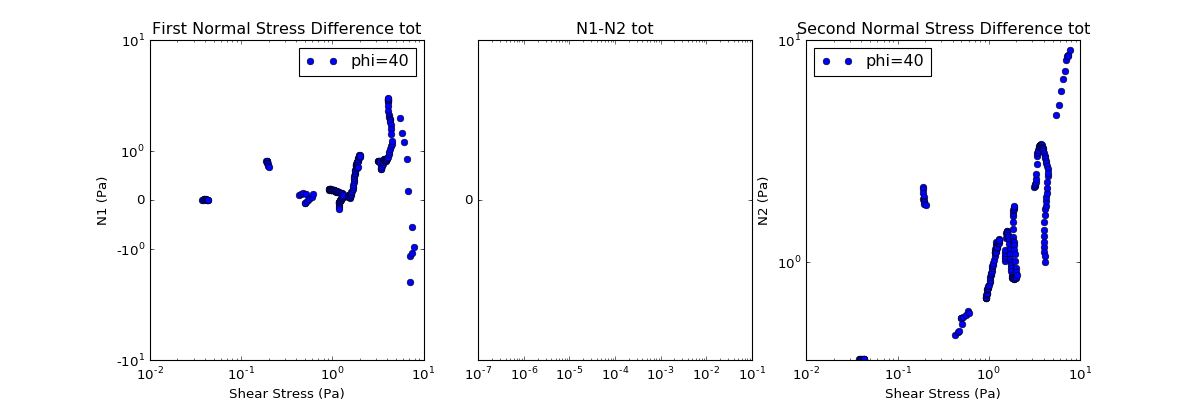

operands could not be broadcast together with shapes (2,189) (609,) 


In [6]:
#phivals = [float(i)/100.0 for i in sys.argv[1:]]
f1 = FloatProgress(min=0, max=100)
display(f1)
L1 = widgets.Label("")
display(L1)
progress1 = widgets.Label("")
display(progress1)


def num_points(max_strain):
    if max_strain < 1.0: return -5
    elif (max_strain >= 1.0) and (max_strain <=2.0): return -10

db = dict()
def analyze_normal_stress_difference_vs_phi(path_addition,type): 
    phivals = [40.,45.,50.,54.,55.,56.]
    #solid part
    ialist = ['tot','hd','lub','rep','fric']

    folders = get_folder_list(path_addition)
#     db = dict()
    for p in phivals:
        db[p] = dict()
        db[p]['shearrate'] = []
        db[p]['shearstress'] = []
        for ia in ialist:
            db[p][ia] = [[],[],[]]

    for num,folder in enumerate(np.sort(folders[:])):
        try:
            path = folder+"/result/part_stress_norm_"+ia+"_t.dat"
            if os.path.exists(path):
                exp = reader.DataSet(folder, fluid=False, particles=True)
                exp.load_state(exp.tlist[-1])

                max_strain = float(exp.t)*exp.shearrate*exp.dt
                n = len(exp.tlist[1:])
                if max_strain >= 2:
                    n_last_strain = int(float(n)/max_strain*(max_strain - 1))
                    n_first_strain = int(float(n)/max_strain)
                else:
                    n_last_strain = -10
                    n_first_strain = -10

                f1.value = float(num+1)/len(folders[:])*100
                L1.value = folder
                p = round(exp.phi*100)
                db_visc = pd.read_csv(folder+"/result/nu_t.dat")
                visc = db_visc[db_visc.columns[2]]
                time = db_visc[db_visc.columns[0]]
                shearstress = np.multiply(visc,exp.shearrate)

                #type is 'mean' or 'all' or 'half' or 'laststrain'

                if type == 'mean':
                    shearstress = np.mean(shearstress[n_first_strain:])
                    db[p]['shearstress'].append(shearstress)
                    db[p]['shearrate'].append(exp.shearrate)
                if type == 'last':
                    shearstress = shearstress[-20:]
                    db[p]['shearstress'].extend(list(shearstress))
                    db[p]['shearrate'].extend(list(np.ones_like(shearstress)*exp.shearrate))
                if type == 'half':
                    shearstress = shearstress[int(len(shearstress)/2):]
                    db[p]['shearstress'].extend(list(shearstress))
                    db[p]['shearrate'].extend(list(np.ones_like(shearstress)*exp.shearrate))
                if type == 'laststrain':
                    shearstress = shearstress[n_last_strain:]
                    db[p]['shearstress'].extend(list(shearstress))
                    db[p]['shearrate'].extend(list(np.ones_like(shearstress)*exp.shearrate))

                for ia in ialist:
                    path = folder+"/result/part_stress_norm_"+ia+"_t.dat"
                    df = pd.read_csv(path)
                    s11 = np.asarray(df[df.columns[2]])
                    s22 = np.asarray(df[df.columns[3]])
                    s33 = np.asarray(df[df.columns[4]])
                    if type == 'last20':
                        s11 = s11[-20:]
                        s22 = s22[-20:]
                        s33 = s33[-20:]
                        db[p][ia][0].extend(s11)
                        db[p][ia][1].extend(s22)
                        db[p][ia][2].extend(s33)
                    if type == 'laststrain':
                        s11 = s11[n_last_strain:]
                        s22 = s22[n_last_strain:]
                        s33 = s33[n_last_strain:]
                        db[p][ia][0].extend(s11)
                        db[p][ia][1].extend(s22)
                        db[p][ia][2].extend(s33)                
                    if type == 'half':
                        s11 = s11[int(len(s11)/2):]
                        s22 = s22[int(len(s22)/2):]
                        s33 = s33[int(len(s33)/2):]
                        db[p][ia][0].extend(s11)
                        db[p][ia][1].extend(s22)
                        db[p][ia][2].extend(s33)                    
                    if type == 'mean':
                        s11 = np.mean(s11[n_first_strain:])
                        s22 = np.mean(s22[n_first_strain:])
                        s33 = np.mean(s33[n_first_strain:])
                        db[p][ia][0].append(s11)
                        db[p][ia][1].append(s22)
                        db[p][ia][2].append(s33)

        except Exception as e: 
            print folder,str(e)
            continue


    



def plot_N1N2(path_addition,analyze,phivals,ia,type,x_axis,marker,xlog,ylog,norm):
    if analyze == "True":
        analyze_normal_stress_difference_vs_phi(path_addition,type)
    for p in db.keys():
        for q in db[p].keys():
            db[p][q] = np.asarray(db[p][q])
    
    philist = phivals
    # for ia in ialist:

    plt.figure(figsize=[15,5])
    plt.subplot(131)
    plt.title("First Normal Stress Difference "+ia)
    for p in philist:
        if xlog:
            plt.xscale('log')
        if ylog:
            plt.yscale('symlog')
        try:
            if x_axis == 'shearstress':
                X,Y = sort_data(db[p]['shearstress'], np.asarray(db[p][ia][0])- np.asarray(db[p][ia][2]))
#                 X,Y = sort_data(db[p]['shearstress'], np.asarray(db[p][ia][0])- 2*np.asarray(db[p][ia][2]))+ np.asarray(db[p][ia][1])
                plt.plot(X,Y,marker,label="phi="+str(p))
                plt.xlabel('Shear Stress (Pa)')
            if x_axis == 'shearrate':
                X,Y = sort_data(db[p]['shearrate'], np.asarray(db[p][ia][0])- np.asarray(db[p][ia][2]))
#                 X,Y = sort_data(db[p]['shearstress'], np.asarray(db[p][ia][0])- 2*np.asarray(db[p][ia][2]))+ np.asarray(db[p][ia][1])
                plt.plot(X,Y,marker,label="phi="+str(p))
                plt.xlabel('Shear rate (1/s)')
            plt.legend(loc="top left")
            plt.ylabel('N1 (Pa)')
            plt.show()
        except Exception as e: 
            print str(e)
            continue
    plt.subplot(132)
    plt.title("N1-N2 "+ia)
    for p in philist:
        if xlog:
            plt.xscale('log')
        if ylog:
            plt.yscale('symlog')
        try:
            if x_axis == 'shearstress':
#                 X,Y = sort_data(db[p]['shearstress'], np.asarray(db[p][ia][0])- np.asarray(db[p][ia][2]))
                X,Y = sort_data(db[p]['shearstress'], np.asarray(db[p][ia][0])- 2*np.asarray(db[p][ia][2]))+ np.asarray(db[p][ia][1])
                if norm: X, Y = np.abs(X),np.abs(Y)
                plt.plot(X,Y,marker,label="phi="+str(p))
                plt.xlabel('Shear Stress (Pa)')
            if x_axis == 'shearrate':
#                 X,Y = sort_data(db[p]['shearrate'], np.asarray(db[p][ia][0])- np.asarray(db[p][ia][2]))
                X,Y = sort_data(db[p]['shearstress'], np.asarray(db[p][ia][0])- 2*np.asarray(db[p][ia][2]))+ np.asarray(db[p][ia][1])
                plt.plot(X,Y,marker,label="phi="+str(p))
                if norm: X, Y = np.abs(X),np.abs(Y)
                plt.xlabel('Shear rate (1/s)')
            plt.legend(loc="top left")
            plt.ylabel('N1-N2 (Pa)')
            plt.show()
        except Exception as e: 
            print str(e)
            continue
    plt.subplot(133)
    plt.title("Second Normal Stress Difference "+ia)
    for p in philist:
        if xlog:
            plt.xscale('log')
        if ylog:
            plt.yscale('symlog')
        try:
#             X, Y = sort_data(db[p]['shearstress'], np.asarray(db[p][ia][2])- np.asarray(db[p][ia][1]))
#             X, Y = sort_data(db[p]['shearrate'], np.asarray(db[p][ia][2])- np.asarray(db[p][ia][1]))
#             plt.plot(X, Y ,'--o',label="phi="+str(p))
            if x_axis == 'shearstress':
                X,Y = sort_data(db[p]['shearstress'], np.asarray(db[p][ia][2])- np.asarray(db[p][ia][1]))
                plt.plot(X,Y,marker,label="phi="+str(p))
                plt.xlabel('Shear Stress (Pa)')
            if x_axis == 'shearrate':
                X,Y = sort_data(db[p]['shearrate'], np.asarray(db[p][ia][2])- np.asarray(db[p][ia][1]))
                plt.plot(X,Y,marker,label="phi="+str(p))
                plt.xlabel('Shear rate (1/s)')
            plt.legend(loc="upper left")
#             plt.xlabel('Shear Stress (Pa)')
#             plt.xlabel('Shear rate (1/s)')
            plt.ylabel('N2 (Pa)')
            plt.show()
        except Exception as e: 
            print str(e)
            continue
    plt.savefig('NormalStressDifference_vs_shearrate_'+ia+'.png')


v1 = interactive(plot_N1N2, \
                 path_addition = widgets.Text(value="./"),\
                 analyze = widgets.ToggleButtons(options = ["True","False"]),\
                 type = widgets.ToggleButtons(options = ['mean', 'last20','half','laststrain'], value = 'mean'),\
                phivals = widgets.SelectMultiple(options=[40,45,50,54,55,56,58],value=[56],disabled=False), \
                ia= widgets.ToggleButtons(options=['tot','lub','hd','rep','fric'], value= 'tot'),\
                x_axis = widgets.ToggleButtons(options = ['shearstress','shearrate']),\
                 marker = widgets.Text(value="o"),\
                xlog = widgets.ToggleButtons(options = ["True","False"]),\
                 ylog = widgets.ToggleButtons(options = ["True","False"]),\
                  norm = widgets.ToggleButtons(description = "use absolute value of stresses?", options = ["True","False"]),\
                __manual=True)

display(v1)

# Plotting the timeseries of viscosity, N, N2, Sxx, Syy, Szz 

<IPython.core.display.Javascript object>


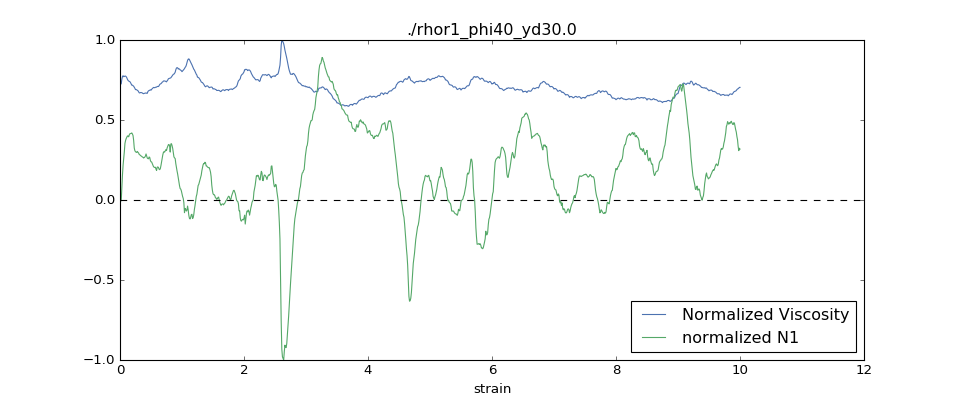

Viscosity Values are normalized by absolute value of :5.29957496878
N1 Values are normalized by absolute value of :0.111351895807
min and max N1 at timesteps : [262] [324]  or [-740] [-678] 1000


In [30]:
# max_n1 = widgets.Label("N1 Values are normalized by absolute value of :")
# display(max_n1)
# max_n2 = widgets.Label("N2 Values are normalized by absolute value of :")
# display(max_n2)
def plot_timeseries(path_addition,phival,ydval,ia,viscosity,n1,n2,s1,s2,s3,sN):

    plt.style.use('seaborn-deep')
    
    path = path_addition+"rhor1_phi"+str(phival)+"_yd"+str(float(ydval))

    nufile = path+"/result/nu_t.dat" 
    stressfile = path+"/result/part_stress_norm_"+ia+"_t.dat" 
    
    
    
    if os.path.exists(nufile):
        plt.figure(figsize=[12,5])

        minshear = 100000
        db = pd.read_csv(nufile)
        nu = db[db.columns[2]]
        nu_rel = db[db.columns[4]]
        t = db[db.columns[1]]
#         shearrate = float(nufile.split("_")[2].split("/")[0].split("yd")[1])
        shearrate = ydval
        shear = t*shearrate
        if minshear > shear.max(): minshear = shear.max()
#         nu = nu_rel*1.002e-3
        nu = nu_rel
#         plt.plot(shear,np.log10(nu_rel),label="log10 Viscosity")
        if viscosity:
            print "Viscosity Values are normalized by absolute value of :" + str(max(abs(nu[:len(shear)])))
            plt.plot(shear[:len(shear)],nu[:len(shear)]/max(abs(nu[:len(shear)])),label="Normalized Viscosity")
        
        df = pd.read_csv(stressfile)
        s11 = np.asarray(df[df.columns[2]])
        s22 = np.asarray(df[df.columns[3]])
        s33 = np.asarray(df[df.columns[4]])
        N1 = s11 - s33
        N2 = s33 - s22

        if s1: 
            print "Sxx Values are normalized by absolute value of :" + str(max(abs(s11[:len(shear)])))
            plt.plot(shear,s11[:len(shear)]/max(abs(s11[:len(shear)])),label = "Sxx")
        if s2: 
            print "Syy Values are normalized by absolute value of :" + str(max(abs(s22[:len(shear)])))
            plt.plot(shear,s22[:len(shear)][:len(shear)]/max(abs(s22[:len(shear)])),label = "Syy")
        if s3: 
            print "Szz Values are normalized by absolute value of :" + str(max(abs(s33[:len(shear)])))
            plt.plot(shear,s33[:len(shear)]/max(abs(s33[:len(shear)])),label = "Szz")
            
        if n1:
#             max_n1.value = "N1 Values are normalized by absolute value of :" + str(max(abs(N1[:len(shear)])))
            print "N1 Values are normalized by absolute value of :" + str(max(abs(N1[:len(shear)])))
            plt.plot(shear,N1[:len(shear)]/max(abs(N1[:len(shear)])),label="normalized N1")
            idx_min = np.where(N1 == N1.min())[0]
            idx_max = np.where(N1 == N1.max())[0]
            print "min and max N1 at timesteps :",idx_min, idx_max, " or", idx_min - len(N1)-2, idx_max- len(N1)-2, len(N1)
        if n2:
#             max_n2.value = "N2 Values are normalized by absolute value of :" + str(max(abs(N2[:len(shear)])))
            print "N2 Values are normalized by absolute value of :" + str(max(abs(N2[:len(shear)])))
            plt.plot(shear,N2[:len(shear)]/max(abs(N2[:len(shear)])),label="normalized N2")
        if sN:
#             max_n2.value = "N2 Values are normalized by absolute value of :" + str(max(abs(N2[:len(shear)])))
            print "N1-N2 Values are normalized by absolute value of :" + str(max(abs(N2[:len(shear)])))
            plt.plot(shear,N2[:len(shear)]/max(abs(N2[:len(shear)]))-N1[:len(shear)]/max(abs(N2[:len(shear)])),label="normalized N1-N2")
        plt.legend(loc="best")
        plt.title(path)
#         plt.yscale("symlog")
        plt.xlabel("strain")
#         plt.ylabel(" viscosity Pa.s")
        plt.axhline(0,color = 'k',ls = '--')
    #     plt.xlim([0,minshear])
        name = "comparison_viscosity_" + str(phival)+ '_'+str(ydval)
    #     plt.savefig(name)
    else:
        print "no data found, check location"
v = interactive(plot_timeseries, \
                path_addition = widgets.Text(value="larger_system_size/from_cartesius/F_CL_2e-10/"),\
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                ydval= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,100,200,300,1000], value= 10),\
                ia = widgets.ToggleButtons(options = ['tot','fric','rep','lub'],value = 'tot'),\
                viscosity=widgets.widget_bool.Checkbox(value = True, description = "Viscosity"),\
                n1=widgets.widget_bool.Checkbox(value = True, description = "N1"),\
                n2=widgets.widget_bool.Checkbox(value = False,description = "N2"),\
                 s1=widgets.widget_bool.Checkbox(value = False,description = "Sxx"),\
                 s2=widgets.widget_bool.Checkbox(value = False,description = "Syy"),\
                 s3=widgets.widget_bool.Checkbox(value = False,description = "Szz"),\
                 sN=widgets.widget_bool.Checkbox(value = False,description = "SN"),\
                __manual=False)

# display(v)
display(widgets.VBox(v.children[:3]))
display(widgets.HBox(v.children[3:8]))
display(widgets.HBox(v.children[8:]))

In [8]:
# Normal Stress Measurements

# plot normal stresses and shear stresses 

phi=56 yd=1usable points=334
phi=56 yd=10usable points=412
phi=56 yd=11usable points=950
phi=56 yd=11.5usable points=949
phi=56 yd=12usable points=844
phi=56 yd=12.5usable points=915
phi=56 yd=13usable points=913
phi=56 yd=14usable points=950
phi=56 yd=15usable points=262
File ./rhor1_phi56_yd16.0/result/part_stress_norm_tot_t.dat does not exist
phi=56 yd=18usable points=950
phi=56 yd=20usable points=449
File ./rhor1_phi56_yd30.0/result/part_stress_norm_tot_t.dat does not exist
phi=56 yd=50usable points=703
phi=56 yd=70usable points=392
phi=56 yd=100usable points=656
phi=56 yd=100usable points=656
File ./rhor1_phi56_yd200.0/result/part_stress_norm_tot_t.dat does not exist
phi=56 yd=300usable points=524
File ./rhor1_phi56_yd1000.0/result/part_stress_norm_tot_t.dat does not exist


<IPython.core.display.Javascript object>


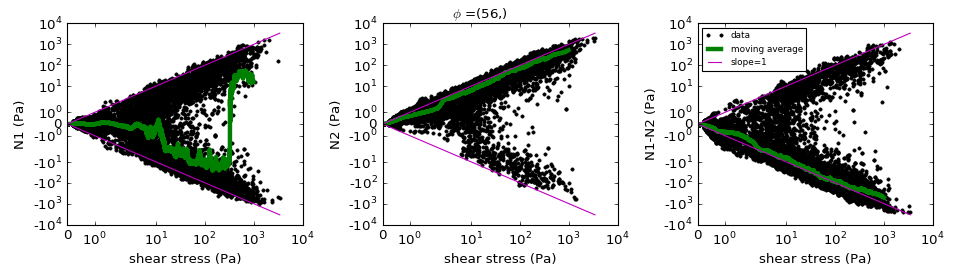

In [46]:
f1 = FloatProgress(min=0, max=100)
display(f1)
L1 = widgets.Label("")
display(L1)
progress1 = widgets.Label("")
display(progress1)
    
def plot_(x,y,plot_all,interpolation_degree,slope):
    if "all_data" in plot_all: 
        plt.plot(x,y,'k.',label="data")
    if "fit" in plot_all:
        fit  = np.poly1d(np.polyfit(x, y, interpolation_degree))
        plt.plot(x,fit(x),"r.",linewidth=1,label="fit")
    if "average" in plot_all:
        N = interpolation_degree
        new_y = [yi for (xi,yi) in sorted(zip(x,y))]
        new_x = np.sort(x)
        y_mean = np.convolve(new_y, np.ones((N,))/N, mode='valid')
        x_mean= np.convolve(new_x, np.ones((N,))/N, mode='valid')
        plt.plot(x_mean,y_mean,'g',linewidth=4,label="moving average")
    if "slope_line" in plot_all:
        xs= np.linspace(min(x),max(x),50)
        plt.plot(xs,[i*slope for i in xs],'m',label="slope="+str(slope))
        plt.plot(xs,[-i*slope for i in xs],'m')
def get_normal_stress_differences(path_addition,phivals, ydvals,ia,scale,plot_all,interpolation_degree,dpi=80,slope=1):
    N1_list = []
    N2_list = []
    Ndiff_list = []
    nu_list = []
    shearstress_list = []
    normal_stress_z_list = []
    
    for phival in phivals:
        for ydval in ydvals:
            try:
                stress_path = path_addition+"rhor1_phi"+str(phival)+"_yd"+str(float(ydval))+"/result/part_stress_norm_"+ia+"_t.dat"
                nu_path = path_addition+"rhor1_phi"+str(phival)+"_yd"+str(float(ydval))+"/result/nu_t.dat"
                #define paths to datafile here
                df_stress = pd.read_csv(stress_path)
                s11 = np.asarray(df_stress[df_stress.columns[2]])[50:]
                s22 = np.asarray(df_stress[df_stress.columns[3]])[50:]
                s33 = np.asarray(df_stress[df_stress.columns[4]])[50:]
                #calculate N1,N1,N1-N2 
                N1 = s11-s33
                N2 = s33-s22
                Ndiff =  N1 - N2
                #get viscosity and calculate shear stress from viscosity
                nu = pd.read_csv(nu_path)
                nu = nu[nu.columns[2]][50:]
                shearstress = np.multiply(nu,ydval)
                #appending the N1,N2 and shear stress vals to the the main lists
                usable_idx = min(len(nu),len(N1))
                print "phi="+str(phival)+ " yd="+str(ydval)+ "usable points="+str(usable_idx)
                N1_list.extend(N1[:usable_idx])
                N2_list.extend(N2[:usable_idx])
                Ndiff_list.extend(Ndiff[:usable_idx])
                shearstress_list.extend(shearstress[:usable_idx])
                normal_stress_z_list.extend(s33[:usable_idx])
            except Exception as e:
                print e 
                continue
                
    plt.figure(figsize=[12,3.5],dpi=dpi)
    plt.suptitle("$\phi$ ="+ str(phivals))
    
    plt.subplot(131)
    plot_(shearstress_list,N1_list,plot_all,interpolation_degree,slope)
    plt.xscale(scale);plt.yscale(scale)
    plt.xlabel("shear stress (Pa)"); plt.ylabel("N1 (Pa)")
    plt.xlim([0,10000])
    plt.ylim([-10000,10000])
    
    plt.subplot(132)
    plot_(shearstress_list,N2_list,plot_all,interpolation_degree,slope)
    plt.xscale(scale);plt.yscale(scale)
    plt.xlabel("shear stress (Pa)"); plt.ylabel("N2 (Pa)")
    plt.xlim([0,10000])
    plt.ylim([-10000,10000])
    
    plt.subplot(133)
    plot_(shearstress_list,Ndiff_list,plot_all,interpolation_degree,slope)
#     plot_(shearstress_list,normal_stress_z_list,plot_all,interpolation_degree,slope)
    plt.xscale(scale);plt.yscale(scale)
    plt.xlabel("shear stress (Pa)"); plt.ylabel("N1-N2 (Pa)")
#     plt.xlabel("shear stress (Pa)"); plt.ylabel("normal stress s33 (Pa)")
    plt.xlim([0,10000])
    plt.ylim([-10000,10000])
    
    plt.legend(loc="best",fontsize=8)
    plt.tight_layout()
    
widget_get_normal_stress_differences = interactive(get_normal_stress_differences, \
    path_addition = widgets.Text(value="./"),\
    phivals = widgets.SelectMultiple(options=[40,45,50,54,55,56,58],value=[56],disabled=False), \
    ydvals= widgets.SelectMultiple(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,100,200,300,1000],
                                   value=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,100,200,300,1000]),\
    ia= widgets.ToggleButtons(options=['tot','lub','hd','rep','fric'], value= 'tot'),\
#     x_axis = widgets.ToggleButtons(options = ['shearstress','shearrate']),\
#      marker = widgets.Text(value="o"),\
    scale = widgets.ToggleButtons(options = ["log","linear","symlog"], value= "symlog"),\
#       norm = widgets.ToggleButtons(description = "use absolute value of stresses?", options = ["True","False"]),\
    plot_all = widgets.SelectMultiple(options= ["fit","all_data","average","slope_line"], value = ["fit","all_data","average","slope_line"]),\
    interpolation_degree = widgets.IntText(value=30,max=300,min=1),\
    __manual=True)

display(widgets.HBox(widget_get_normal_stress_differences.children[:3]))
display(widgets.HBox(widget_get_normal_stress_differences.children[3:6]))
display(widgets.HBox(widget_get_normal_stress_differences.children[6:]))